<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Concatenating-vs.-merging" data-toc-modified-id="Concatenating-vs.-merging-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Concatenating vs. merging</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Generate-data" data-toc-modified-id="Generate-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate data</a></span></li><li><span><a href="#Concatenating" data-toc-modified-id="Concatenating-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Concatenating</a></span><ul class="toc-item"><li><span><a href="#Concatenating-by-columns" data-toc-modified-id="Concatenating-by-columns-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Concatenating by columns</a></span></li><li><span><a href="#Concatenating-by-rows" data-toc-modified-id="Concatenating-by-rows-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Concatenating by rows</a></span></li></ul></li><li><span><a href="#Merging" data-toc-modified-id="Merging-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Merging</a></span><ul class="toc-item"><li><span><a href="#Inner-and-Outer-Join" data-toc-modified-id="Inner-and-Outer-Join-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Inner and Outer Join</a></span></li><li><span><a href="#Left-and-Right-Join" data-toc-modified-id="Left-and-Right-Join-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Left and Right Join</a></span></li><li><span><a href="#Joining-when-using-Index" data-toc-modified-id="Joining-when-using-Index-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Joining when using Index</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Combining pandas dataframes

</font>
</div>

# Concatenating vs. merging
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- Merging or joining the dataFrames is different from concatenating. 
- **Concatenating** means just stacking up one dataFrame on another along the desired axis.  
- **Joining** works just like the joins in SQL. We can combine the dataFrames based on a unique column.

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas as pd

# Generate data
<hr style = "border:2px solid black" ></hr>

In [10]:
# First Dict with two 2 and 4 columns
data_one = {'A': ['A1', 'A2', 'A3', 'A4'], 'B': ['B1', 'B2', 'B3', 'B4']}

# Second Dict with two 2 and 4 columns
data_two = {'C': ['C1', 'C2', 'C3', 'C4'], 'D': ['D1', 'D2', 'D3', 'D4']}

# Converting to DataFrames
df_one = pd.DataFrame(data_one)
df_two = pd.DataFrame(data_two)

In [11]:
df_one

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4


In [12]:
df_two

,C,D
0,C1,D1
1,C2,D2
2,C3,D3
3,C4,D4


In [16]:
# First DataFrame
sports = pd.DataFrame({'sports_id': [1, 2, 3, 4], 'name': [
                      'Alex', 'David', 'James', 'Sara']})

# Second DataFrame
library = pd.DataFrame({'library_id': [1, 2, 3, 4], 'name': [
                       'David', 'James', 'Peter', 'Harry']})

In [17]:
sports

,sports_id,name
0,1,Alex
1,2,David
2,3,James
3,4,Sara


In [18]:
library

,library_id,name
0,1,David
1,2,James
2,3,Peter
3,4,Harry


# Concatenating
<hr style = "border:2px solid black" ></hr>

## Concatenating by columns

In [13]:
# Joining the columns
new_df = pd.concat([df_one,df_two],axis=1)
new_df

,A,B,C,D
0,A1,B1,C1,D1
1,A2,B2,C2,D2
2,A3,B3,C3,D3
3,A4,B4,C4,D4


## Concatenating by rows

In [14]:
# Joining the rows
df_two.columns = df_one.columns
new_df3 = pd.concat([df_one,df_two],axis=0 )
new_df3 

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4
0,C1,D1
1,C2,D2
2,C3,D3
3,C4,D4


In [15]:
# Joining the rows
df_two.columns = df_one.columns
new_df3 = pd.concat([df_one,df_two],axis=0 , ignore_index= True)
new_df3 

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4
4,C1,D1
5,C2,D2
6,C3,D3
7,C4,D4


# Merging
<hr style = "border:2px solid black" ></hr>

## Inner and Outer Join

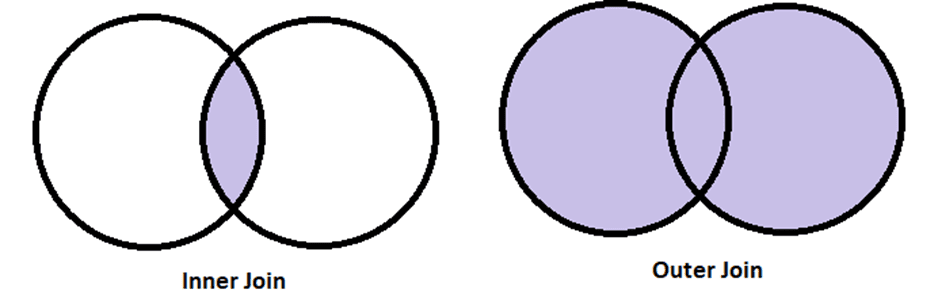

In [19]:
inner_join = pd.merge(sports, library, how="inner", on="name")
outer_join = pd.merge(library, sports, how="outer", on="name")

In [20]:
inner_join

,sports_id,name,library_id
0,2,David,1
1,3,James,2


In [21]:
outer_join

,library_id,name,sports_id
0,1.0,David,2.0
1,2.0,James,3.0
2,3.0,Peter,NaN
3,4.0,Harry,NaN
4,NaN,Alex,1.0
5,NaN,Sara,4.0


## Left and Right Join

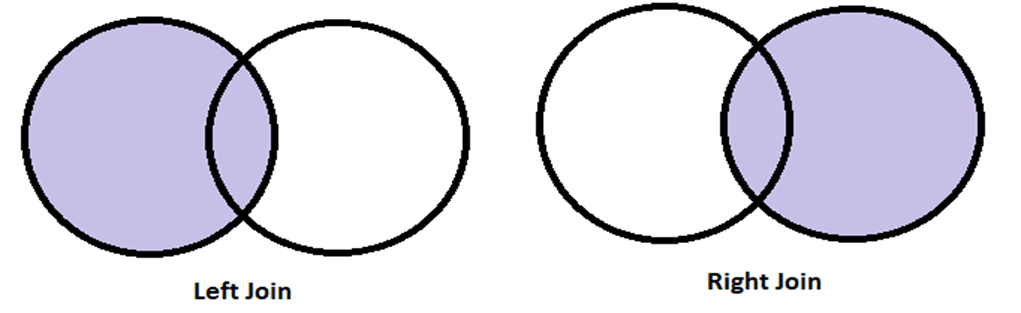

In [22]:
left_join = pd.merge(sports, library, how="left", on="name")

right_join = pd.merge(library, sports, how="right", on="name")

In [23]:
left_join

,sports_id,name,library_id
0,1,Alex,NaN
1,2,David,1.0
2,3,James,2.0
3,4,Sara,NaN


In [24]:
right_join

,library_id,name,sports_id
0,NaN,Alex,1
1,1.0,David,2
2,2.0,James,3
3,NaN,Sara,4


## Joining when using Index

In [25]:
sports = sports.set_index("name")
sports

,sports_id
name,
Alex,1
David,2
James,3
Sara,4


In [26]:
index_join = pd.merge(sports, library, how="inner",
                      left_index=True, right_on="name")
index_join

,sports_id,library_id,name
0,2,1,David
1,3,2,James


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://towardsdatascience.com/create-robust-data-pipelines-with-prefect-docker-and-github-12b231ca6ed2

</font>
</div>